# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [4]:
df_raw.describe()

/Users/jenny/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a large STD than GPA because GRE score is out of a wider range than GPA. 

#### Question 4. Drop data points with missing data


In [17]:
pd.isnull(df_raw).head()

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [19]:
df_raw_new = df_raw.dropna()
df_raw_new.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [20]:
df_raw_new.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The count for each variable is the same! (397) Also, the quartile values are not "NaaN" anymore.

#### Question 6. Create box plots for GRE and GPA

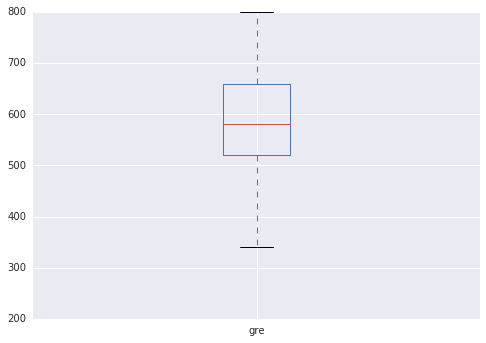

In [21]:
#boxplot 1
df_raw_new['gre'].plot(kind='box')

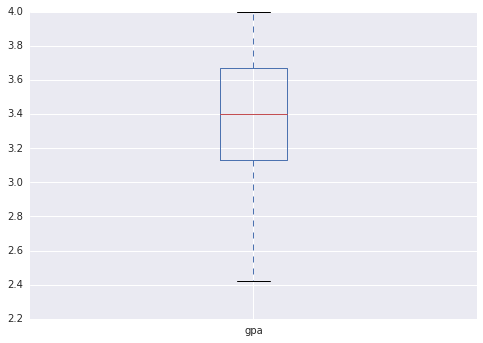

In [22]:
#boxplot 2 
df_raw_new['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The median GRE score is around 580, while the median GPA is around a 3.4

#### Question 8. Describe each distribution 

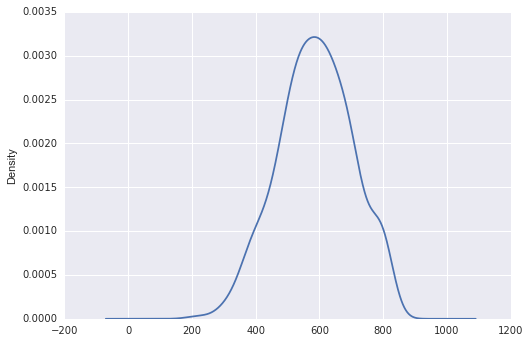

In [23]:
# plot the distribution of each variable 
df_raw_new['gre'].plot(kind='density')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

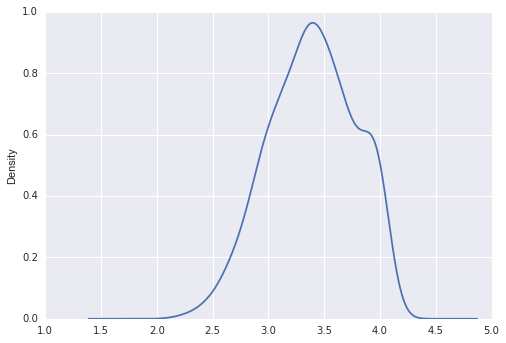

In [24]:
df_raw_new['gpa'].plot(kind='density')

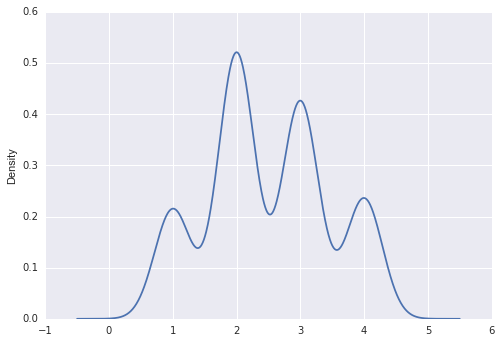

In [25]:
df_raw_new['prestige'].plot(kind='density')

Answer: Nope! the data does not seem to be normally distributed based on the plots.  

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes! The model does not seem to be normally distributed. It could be due to collinearity - the possiblity that some of the variables are not independent of one another. It would help to transform one of the variables into a dummy variable. We could also perform a log transformation of the data.

#### Question 11. Which of our variables are potentially colinear? 

               gpa       gre  prestige
gpa       1.000000  0.382408 -0.060976
gre       0.382408  1.000000 -0.124533
prestige -0.060976 -0.124533  1.000000
Axes(0.125,0.125;0.62x0.775)


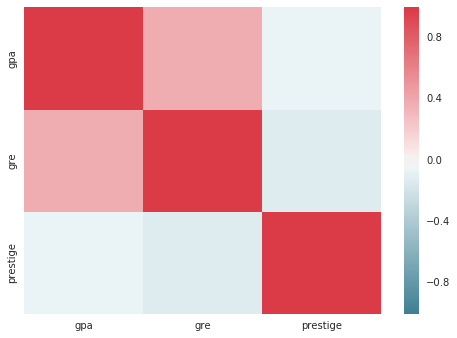

In [26]:
# create a correlation matrix for the data
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap = True)
correlations = df_raw_new[['gpa', 'gre', 'prestige']].corr()
print correlations
print sns.heatmap(correlations, cmap = cmap)

#### Question 12. What did you find?

Answer: There is a possiblity that gre is linearly related to both gpa and prestige. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: In order to explore the association of grad school admissions and prestige of undergraduate schools, I will create a scatter plot to visualize the data. We will then refer to the chart of descriptive statistics values to determine the coefficient for prestige in regards to graduate school admissions. I would then create a confidence interval for our data to make sure it is accurate. 

#### Question 14. What is your hypothesis? 

Answer: The more presitigious the undergraduate school is of the applicant, the more likely he or she will be admitted to graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data